In [106]:
#bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

## Chamaremos a tabela que iremos trabalhar pela biblioteca PANDAS

In [107]:
dispersao = pd.read_csv('experimento01_dispersao.csv',sep=';', decimal=',')

In [108]:
dispersao.head(15)

,Lambda (nm),Elemento,Cor,Lambda (m),1/(Lambda)²,Ângulo e Minuto,Ângulo,Radianos,n,Delta n,Lambda (nm).1
0,404.66,Hg,violeta,4.046600e-07,6.106880e+12,51°24',51.40,0.897099,1.652194,0.000310,404.66
1,435.83,Hg,azul,4.358300e-07,5.264600e+12,50°32',50.53,0.881915,1.643590,0.000308,407.78
2,467.81,Cd,azul escuro,4.678100e-07,4.569420e+12,49°45',49.75,0.868301,1.635795,0.000306,546.07
3,468.01,Zn,azul escuro,4.680100e-07,4.565510e+12,49°45',49.75,0.868301,1.635795,0.000306,578.01
4,472.21,Zn,azul médio,4.722100e-07,4.484660e+12,49°40',49.66,0.866731,1.634891,0.000306,467.81
5,479.99,Cd,azul claro,4.799900e-07,4.340460e+12,49°31',49.51,0.864113,1.633382,0.000305,479.99
6,481.05,Zn,azul claro,4.810500e-07,4.321350e+12,49°31',49.51,0.864113,1.633382,0.000305,508.58
7,508.58,Cd,verde,5.085800e-07,3.866170e+12,49°05',49.08,0.856608,1.629039,0.000304,643.85
8,546.07,Hg,verde,5.460700e-07,3.353540e+12,48°37',48.61,0.848405,1.624267,0.000303,468.01
9,578.01,Hg,amarelo,5.780100e-07,2.993160e+12,48°17',48.28,0.842645,1.620900,0.000302,472.21


## Iremos definir quem será nosso eixo "x" e "y" para construirmos nosso primeiro gráfico

In [109]:
x = dispersao['1/(Lambda)²']
y = dispersao['n']

Text(0, 0.5, 'n')

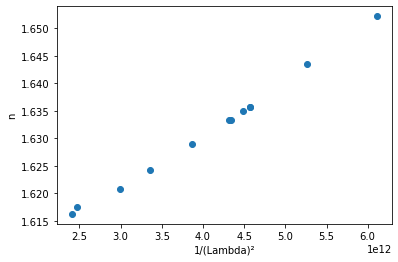

In [110]:
plt.scatter(x,y)
plt.xlabel('1/(Lambda)²')
plt.ylabel('n')

## Iremos treinar nossos dados para calcularmos qual será o nosso coeficiente angular e o linear

In [111]:
x = dispersao[['1/(Lambda)²']]
y = dispersao['n']

In [112]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [113]:
lm = LinearRegression()

In [114]:
lm.fit(x_train, y_train)

LinearRegression()

In [115]:
#Coeficiente angular
b = lm.coef_
print(b)

[9.38187224e-15]


In [116]:
#Coeficiente Linear
a = lm.intercept_
print(a)

1.5931028929727913


## Gráfico fitado

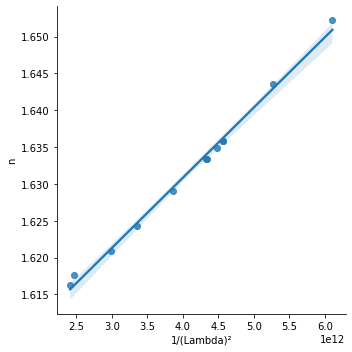

In [117]:
sns.lmplot(x='1/(Lambda)²', y='n',data=dispersao)

## Definiremos um novo "x" e "y" para constrir outro gráfico

In [118]:
x = dispersao['Lambda (m)']
y = dispersao['n']

Text(0, 0.5, 'n')

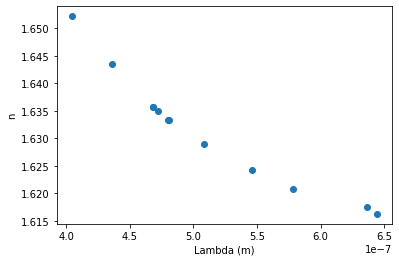

In [119]:
plt.scatter(x,y)
plt.xlabel('Lambda (m)')
plt.ylabel('n')

## Aplicaremos a função n=a+b/lambda^2 no nosso gráfico

In [120]:
def f(x):
    return b*x + a

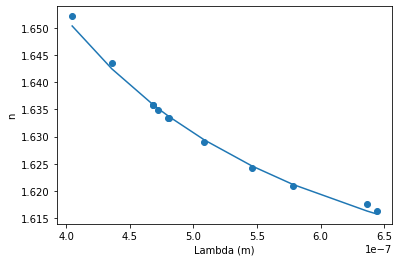

In [122]:
plt.scatter(x,y)
plt.xlabel('Lambda (m)')
plt.ylabel('n')
plt.plot(x,f(1/(x**2)))